In [5]:
import os
from langchain.prompts import PromptTemplate
from langchain.agents import AgentExecutor, create_react_agent
from helpers.get_llm import LLM
from tools.tools import tools_list
from helpers.load_prompt import load_prompt_from_yaml
from tools.state_tool import get_user_state_
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage , AnyMessage
from langgraph.prebuilt import create_react_agent
from typing_extensions import TypedDict
import random
from typing import Literal , Annotated
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import tool_node , tools_condition , tool_validator , ToolNode
from pydantic import BaseModel, Field, constr, confloat

In [9]:

llm = LLM.get_groq_llm()



In [10]:
llm_with_tools = llm.bind_tools(tools_list)

In [11]:
print(llm_with_tools.invoke("Hello Tere"))

content='Hello! How can I assist you today?' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 586, 'prompt_tokens': 447, 'total_tokens': 1033, 'completion_time': 1.429844268, 'prompt_time': 0.033403045, 'queue_time': 0.09352590800000002, 'total_time': 1.463247313}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_605cd2a568', 'finish_reason': 'stop', 'logprobs': None} id='run-0c7fe587-65ae-4772-a854-55f3bb358d8a-0' usage_metadata={'input_tokens': 447, 'output_tokens': 586, 'total_tokens': 1033}


In [12]:
sys_msg = SystemMessage(content="You Are A Helpful Assistat For Student Who Help Then To Navigate In Abrod with day today Life")

In [13]:
def assistant(state : MessagesState) -> AnyMessage:
    return {"messages" : [llm_with_tools.invoke([sys_msg] + state["messages"])]}

In [14]:
builder = StateGraph(MessagesState)


builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools_list))




builder.add_edge(START, "assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools" , "assistant")

react_graph = builder.compile()

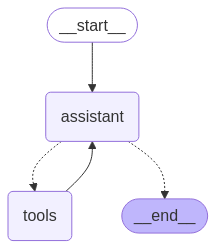

In [15]:
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [18]:
messages = [HumanMessage(content="I am looking for a place to stay")]
res = react_graph.invoke({"messages":messages})
res

s:\miniconda\envs\aca\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


{'messages': [HumanMessage(content='I am looking for a place to stay', additional_kwargs={}, response_metadata={}, id='74fae63d-0244-48c7-98c8-d1daee99159f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hzfn', 'function': {'arguments': '{"query": "places to stay"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 254, 'prompt_tokens': 473, 'total_tokens': 727, 'completion_time': 0.624352564, 'prompt_time': 0.025734191, 'queue_time': 0.09457521399999999, 'total_time': 0.650086755}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-de5abb7d-4d8f-4200-84c7-4f6f48bece38-0', tool_calls=[{'name': 'search', 'args': {'query': 'places to stay'}, 'id': 'call_hzfn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 473, 'output_tokens': 254, 'total_tokens': 727}),
  ToolMessage(content='Preiswerte Hotels in Raisdorf und Umgebung: Entdecken 

AttributeError: 'AddableValuesDict' object has no attribute 'AIMessages'

In [23]:
for m in res['messages']:
    print(m)
    print("==============================================")

content='I am looking for a place to stay' additional_kwargs={} response_metadata={} id='74fae63d-0244-48c7-98c8-d1daee99159f'
content='' additional_kwargs={'tool_calls': [{'id': 'call_hzfn', 'function': {'arguments': '{"query": "places to stay"}', 'name': 'search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 254, 'prompt_tokens': 473, 'total_tokens': 727, 'completion_time': 0.624352564, 'prompt_time': 0.025734191, 'queue_time': 0.09457521399999999, 'total_time': 0.650086755}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_ea798e78f0', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-de5abb7d-4d8f-4200-84c7-4f6f48bece38-0' tool_calls=[{'name': 'search', 'args': {'query': 'places to stay'}, 'id': 'call_hzfn', 'type': 'tool_call'}] usage_metadata={'input_tokens': 473, 'output_tokens': 254, 'total_tokens': 727}
content='Preiswerte Hotels in Raisdorf und Umgebung: Entdecken Sie 44 Hotel-Angebote ab 55€/Nacht (03/2025) » vergleichen und sp

# Adding Memory

In [26]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

In [29]:
grapH_with_memory = builder.compile(checkpointer=memory)

In [30]:
config = {"configurable": {"thread_id": "1234"}}
messages = [HumanMessage(content="I am looking for a place to stay")]

res = grapH_with_memory.invoke({"messages":messages}, config)


s:\miniconda\envs\aca\lib\site-packages\langchain_community\utilities\duckduckgo_search.py:64: UserWarning: backend='api' is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(


In [31]:
for m in res['messages']:
    print(m)
    print("==============================================")

content='I am looking for a place to stay' additional_kwargs={} response_metadata={} id='fb43a860-9f71-4a2f-8ca2-5b79710a0767'
content='' additional_kwargs={'tool_calls': [{'id': 'call_6pn5', 'function': {'arguments': '{"query": "places to stay for students abroad options"}', 'name': 'search'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 200, 'prompt_tokens': 473, 'total_tokens': 673, 'completion_time': 0.485487796, 'prompt_time': 0.031445466, 'queue_time': 0.282797548, 'total_time': 0.516933262}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_27d5db8d87', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-00f7f2c3-4655-4dd7-b485-bd8997a667d6-0' tool_calls=[{'name': 'search', 'args': {'query': 'places to stay for students abroad options'}, 'id': 'call_6pn5', 'type': 'tool_call'}] usage_metadata={'input_tokens': 473, 'output_tokens': 200, 'total_tokens': 673}
content="Error: DuckDuckGoSearchException(RatelimitException('https://lite.duckd

In [32]:
messages = [HumanMessage(content="what was my question before?")]

res = grapH_with_memory.invoke({"messages":messages}, config)

In [34]:
for m in res['messages']:
    m.pretty_print()
    # print("==?============================================")

================================ Human Message =================================

I am looking for a place to stay
================================== Ai Message ==================================
Tool Calls:
  search (call_6pn5)
 Call ID: call_6pn5
  Args:
    query: places to stay for students abroad options
================================= Tool Message =================================
Name: search

Error: DuckDuckGoSearchException(RatelimitException('https://lite.duckduckgo.com/lite/ 202 Ratelimit'))
 Please fix your mistakes.
================================== Ai Message ==================================

Here are common options for students looking for places to stay abroad:

1. **University Accommodations**  
   - Check if your university offers on-campus housing (dorms, apartments) for international students.

2. **Private Rentals**  
   - Platforms like *Airbnb*, *Roomi*, or local real estate sites can help find apartments, shared houses, or homestays.

3. **Student Housing P